<a href="https://www.kaggle.com/arashakbari80/cifar-10-transfer-learning?scriptVersionId=87793560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### About the Dataset
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

### Main Topics:
- Import Libraries
- Loading Data & Data Preprocessing
- Custom CNN 
- Implement AlexNet from Scratch
- ResNet50 (fine tuning)
- MobileNet
- Conclusion

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, GlobalAvgPool2D, Add, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## Loading Data and Preprocessing
First things first, we need to load and visualize our data to get sense over them. 
Then, we start to preprocess them. 
- change dtype
- Normalize
- convert labels to one-hot encoders

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


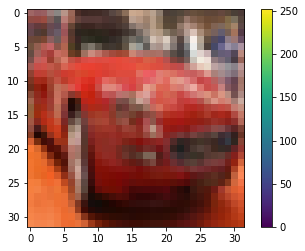

In [3]:
plt.figure()
plt.imshow(train_data[5])
plt.colorbar()
plt.grid(False)

plt.show()

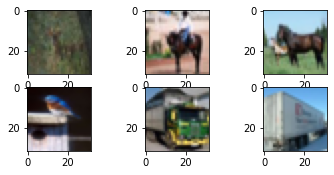

In [4]:
for i in range(6):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_data[i+10])
plt.show()

In [5]:
train_data.shape, train_labels.shape, train_data.dtype, test_data.shape

((50000, 32, 32, 3), (50000, 1), dtype('uint8'), (10000, 32, 32, 3))

In [6]:
train_data = train_data.astype(np.float32) / 255.
test_data = test_data.astype(np.float32) / 255.

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

train_data.shape, train_data.dtype ,train_data.min(), train_data.max()

((50000, 32, 32, 3), dtype('float32'), 0.0, 1.0)

In [7]:
inputs = Input((32,32,3))

x = Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(64, kernel_size=3, strides=1, kernel_initializer='he_normal', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, kernel_size=3, strides=1, kernel_initializer='he_normal', padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, kernel_size=3, kernel_initializer='he_normal', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((4, 4))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(256, kernel_initializer='he_normal', activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(10, activation='softmax')(x)
custom_cnn_model = Model(inputs, output)
custom_cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0     

2022-02-14 08:54:48.953171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 08:54:49.099117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 08:54:49.099820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 08:54:49.100982: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
early_stop = EarlyStopping(monitor='val_acc', patience=5)
custom_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
custom_cnn_model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=0.15, callbacks=[early_stop])

2022-02-14 08:54:53.157714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-02-14 08:54:54.567539: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1329/1329 [==============================] - 14s 6ms/step - loss: 1.9322 - acc: 0.3281 - val_loss: 1.5098 - val_acc: 0.4371
Epoch 2/10
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3886 - acc: 0.5000 - val_loss: 1.1345 - val_acc: 0.5892
Epoch 3/10
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1857 - acc: 0.5802 - val_loss: 1.0022 - val_acc: 0.6361
Epoch 4/10
1329/1329 [==============================] - 7s 5ms/step - loss: 1.0522 - acc: 0.6289 - val_loss: 0.9369 - val_acc: 0.6639
Epoch 5/10
1329/1329 [==============================] - 7s 5ms/step - loss: 0.9470 - acc: 0.6672 - val_loss: 0.8333 - val_acc: 0.7101
Epoch 6/10
1329/1329 [==============================] - 7s 5ms/step - loss: 0.8534 - acc: 0.7050 - val_loss: 0.7958 - val_acc: 0.7260
Epoch 7/10
1329/1329 [==============================] - 7s 5ms/step - loss: 0.7748 - acc: 0.7317 - val_loss: 0.7322 - val_acc: 0.7456
Epoch 8/10
1329/1329 [==============================] - 7s 6ms/step - lo

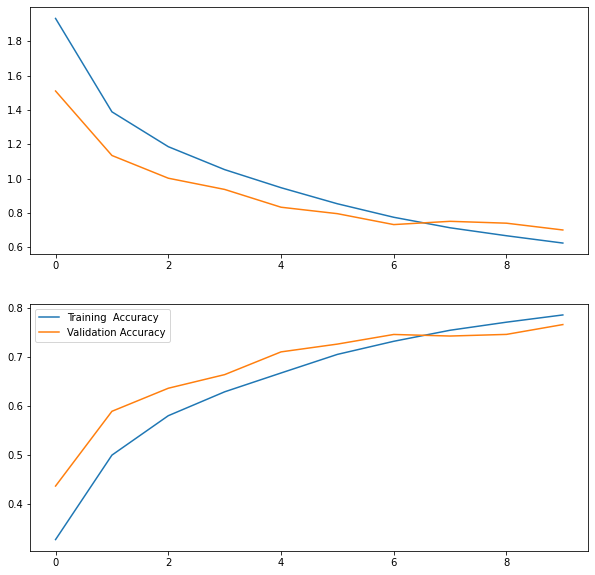

In [10]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(custom_cnn_model.history.history['loss'],label='Training Loss')
ax[0].plot(custom_cnn_model.history.history['val_loss'],label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(custom_cnn_model.history.history['acc'],label='Training  Accuracy')
ax[1].plot(custom_cnn_model.history.history['val_acc'],label='Validation Accuracy')

plt.legend()

In [11]:
custom_cnn_model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7034 - acc: 0.7636


[0.7034021615982056, 0.7635999917984009]

## AlexNet 
AlexNet contained eight layers; the first five were convolutional layers, some of them followed by max-pooling layers, and the last three were fully connected layers. It used the non-saturating ReLU activation function, which showed improved training performance over tanh and sigmoid.

AlexNet is considered one of the most influential papers published in computer vision, having spurred many more papers published employing CNNs and GPUs to accelerate deep learning. As of 2021, the AlexNet paper has been cited over 80,000 times according to Google Scholar.

In [12]:
inputs = Input((32, 32, 3))

x = tf.keras.layers.UpSampling2D((2,2))(inputs)

x = Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3,3))(x)

x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(10, activation='softmax')(x)
    
alexnet_model = Model(inputs, output)
    
alexnet_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 256)         1024

In [13]:
early_stop = EarlyStopping(monitor='val_acc', patience=5)
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
alexnet_model.fit(train_data, train_labels, batch_size=32, epochs=50, validation_split=0.15, callbacks=[early_stop])

Epoch 1/50
1329/1329 [==============================] - 10s 7ms/step - loss: 1.7286 - acc: 0.3745 - val_loss: 1.5989 - val_acc: 0.4264
Epoch 2/50
1329/1329 [==============================] - 9s 7ms/step - loss: 1.3857 - acc: 0.5144 - val_loss: 1.6708 - val_acc: 0.4095
Epoch 3/50
1329/1329 [==============================] - 9s 7ms/step - loss: 1.2248 - acc: 0.5831 - val_loss: 1.3934 - val_acc: 0.5140
Epoch 4/50
1329/1329 [==============================] - 9s 7ms/step - loss: 1.1009 - acc: 0.6304 - val_loss: 1.3641 - val_acc: 0.5288
Epoch 5/50
1329/1329 [==============================] - 10s 7ms/step - loss: 0.9907 - acc: 0.6697 - val_loss: 1.0768 - val_acc: 0.6421
Epoch 6/50
1329/1329 [==============================] - 9s 7ms/step - loss: 0.8845 - acc: 0.7091 - val_loss: 1.1746 - val_acc: 0.6171
Epoch 7/50
1329/1329 [==============================] - 9s 7ms/step - loss: 0.7991 - acc: 0.7379 - val_loss: 1.1165 - val_acc: 0.6171
Epoch 8/50
1329/1329 [==============================] - 9s 7

## Resnet

In [15]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

In [16]:
train_data = tf.keras.applications.resnet50.preprocess_input(train_data)
test_data = tf.keras.applications.resnet50.preprocess_input(test_data)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

train_data.shape, train_data.dtype ,train_data.min(), train_data.max()

((50000, 32, 32, 3), dtype('float32'), -123.68, 151.061)

In [17]:
resnet_model = tf.keras.applications.ResNet50(input_shape=(224, 224,3), include_top=False, weights='imagenet')
# mobile_net_model.trainable = False
# my_smaller_model = Model(mobile_net_model.input , mobile_net_model.get_layer("conv_pw_5_relu").output)
resnet_model.trainable = False

inputs = Input((32, 32, 3))

upscale = tf.keras.layers.UpSampling2D((7,7))(inputs)

base_model_output = resnet_model(upscale)

gap = GlobalAvgPool2D()(base_model_output)
x = BatchNormalization()(gap)

# x = Dense(units= 512, activation='relu')(x)
x = Dense(units= 256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units= 10, activation='softmax')(x)


transfer_model = tf.keras.Model(inputs, output)
transfer_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               524544    
____________________________________________________________

In [18]:
 transfer_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=["categorical_accuracy"])

save_best = tf.keras.callbacks.ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

history = transfer_model.fit(x= train_data, y= train_labels, batch_size=16, epochs=10, validation_split=0.15, callbacks=[save_best])

Epoch 1/10
2657/2657 [==============================] - 99s 36ms/step - loss: 0.9713 - categorical_accuracy: 0.6726 - val_loss: 0.5806 - val_categorical_accuracy: 0.7917


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.7174 - categorical_accuracy: 0.7514 - val_loss: 0.5376 - val_categorical_accuracy: 0.8087
Epoch 3/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.6497 - categorical_accuracy: 0.7770 - val_loss: 0.5094 - val_categorical_accuracy: 0.8160
Epoch 4/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.6080 - categorical_accuracy: 0.7884 - val_loss: 0.5019 - val_categorical_accuracy: 0.8205
Epoch 5/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.5724 - categorical_accuracy: 0.8015 - val_loss: 0.4909 - val_categorical_accuracy: 0.8249
Epoch 6/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.5456 - categorical_accuracy: 0.8101 - val_loss: 0.4864 - val_categorical_accuracy: 0.8256
Epoch 7/10
2657/2657 [==============================] - 95s 36ms/step - loss: 0.5260 - categorical_accuracy: 0.8139 - val_loss: 0.4737 - val_categoric

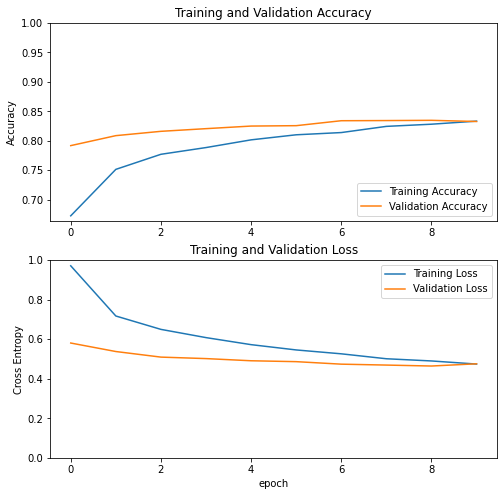

In [19]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [20]:
transfer_model = tf.keras.models.load_model('best_cnn_model.h5')

In [21]:
transfer_model.trainable = True

In [22]:
 transfer_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

save_best = tf.keras.callbacks.ModelCheckpoint("best_cnn_model_2.h5", save_best_only=True)

fine_tune = transfer_model.fit(x= train_data, y= train_labels, batch_size=32, epochs=10, validation_split=0.15, callbacks=[save_best])

Epoch 1/10
1329/1329 [==============================] - 228s 168ms/step - loss: 0.8307 - categorical_accuracy: 0.7322 - val_loss: 0.5373 - val_categorical_accuracy: 0.8184
Epoch 2/10
1329/1329 [==============================] - 223s 168ms/step - loss: 0.5973 - categorical_accuracy: 0.8031 - val_loss: 0.4346 - val_categorical_accuracy: 0.8539
Epoch 3/10
1329/1329 [==============================] - 223s 168ms/step - loss: 0.5073 - categorical_accuracy: 0.8303 - val_loss: 0.3906 - val_categorical_accuracy: 0.8728
Epoch 4/10
1329/1329 [==============================] - 224s 168ms/step - loss: 0.4574 - categorical_accuracy: 0.8476 - val_loss: 0.3628 - val_categorical_accuracy: 0.8775
Epoch 5/10
1329/1329 [==============================] - 223s 168ms/step - loss: 0.4084 - categorical_accuracy: 0.8612 - val_loss: 0.3394 - val_categorical_accuracy: 0.8876
Epoch 6/10
1329/1329 [==============================] - 223s 168ms/step - loss: 0.3789 - categorical_accuracy: 0.8700 - val_loss: 0.3214 - v

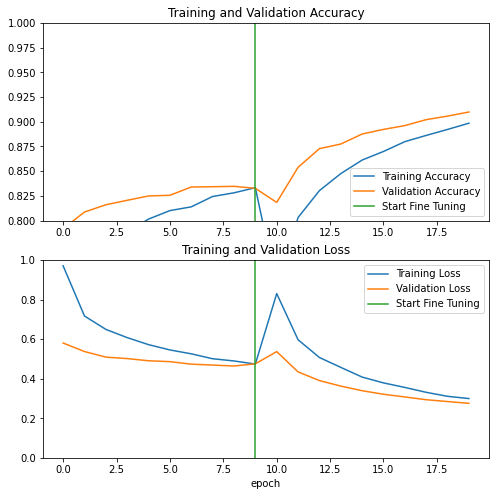

In [23]:
acc += fine_tune.history['categorical_accuracy']
val_acc += fine_tune.history['val_categorical_accuracy']

loss += fine_tune.history['loss']
val_loss += fine_tune.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [24]:
final_model = tf.keras.models.load_model("best_cnn_model_2.h5")
final_model.evaluate(test_data, test_labels)

313/313 [==============================] - 17s 51ms/step - loss: 0.2866 - categorical_accuracy: 0.9033


[0.2865934371948242, 0.9032999873161316]

## MobileNetV2

In [25]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()
train_data = tf.keras.applications.mobilenet_v2.preprocess_input(train_data)
test_data = tf.keras.applications.mobilenet_v2.preprocess_input(test_data)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

train_data.shape, train_data.dtype ,train_data.min(), train_data.max()

((50000, 32, 32, 3), dtype('float32'), -1.0, 1.0)

In [26]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96,3), include_top=False, weights='imagenet')
# mobile_net_model.trainable = False
# my_smaller_model = Model(mobile_net_model.input , mobile_net_model.get_layer("conv_pw_5_relu").output)
mobilenet_model.trainable = False

inputs = Input((32, 32, 3))

# x = tf.keras.layers.RandomFlip('horizontal_and_vertical')(inputs)

# x = tf.keras.layers.RandomRotation(0.2)(x)

upscale = tf.keras.layers.UpSampling2D((3, 3))(inputs)

base_model_output = mobilenet_model(upscale)

gap = GlobalAvgPool2D()(base_model_output)
x = BatchNormalization()(gap)

# x = Dense(units= 1024, activation='relu')(gap)
x = Dense(units= 256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units= 10, activation='softmax')(x)


transfer_model = tf.keras.Model(inputs, output)
transfer_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 96, 96, 3)         0         
_________________________________________________________________
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 1280)              5120      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               327936    
______________________________________________________________

In [27]:
transfer_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=["categorical_accuracy"])

save_best = tf.keras.callbacks.ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

history = transfer_model.fit(x= train_data, y= train_labels, batch_size=32, epochs=10, validation_split=0.15, callbacks=[save_best])

Epoch 1/10
1329/1329 [==============================] - 18s 12ms/step - loss: 1.1406 - categorical_accuracy: 0.6181 - val_loss: 0.7037 - val_categorical_accuracy: 0.7555
Epoch 2/10
1329/1329 [==============================] - 15s 12ms/step - loss: 0.8143 - categorical_accuracy: 0.7176 - val_loss: 0.6420 - val_categorical_accuracy: 0.7827
Epoch 3/10
1329/1329 [==============================] - 15s 11ms/step - loss: 0.7316 - categorical_accuracy: 0.7461 - val_loss: 0.6152 - val_categorical_accuracy: 0.7907
Epoch 4/10
1329/1329 [==============================] - 19s 14ms/step - loss: 0.6895 - categorical_accuracy: 0.7571 - val_loss: 0.5922 - val_categorical_accuracy: 0.7991
Epoch 5/10
1329/1329 [==============================] - 17s 13ms/step - loss: 0.6550 - categorical_accuracy: 0.7704 - val_loss: 0.5821 - val_categorical_accuracy: 0.7989
Epoch 6/10
1329/1329 [==============================] - 16s 12ms/step - loss: 0.6360 - categorical_accuracy: 0.7761 - val_loss: 0.5737 - val_categoric

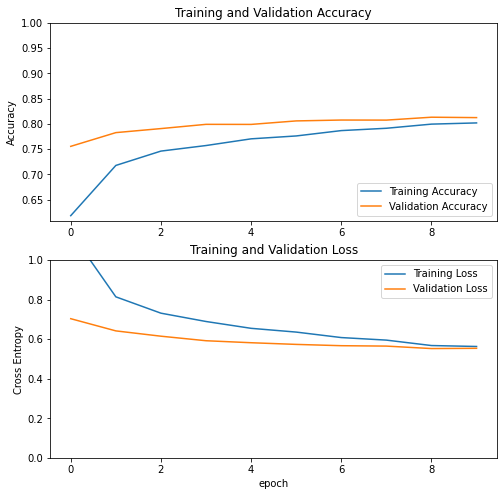

In [28]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [29]:
transfer_model = tf.keras.models.load_model("best_cnn_model.h5")
transfer_model.trainable = True

In [30]:
transfer_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

save_best = tf.keras.callbacks.ModelCheckpoint("best_cnn_model_2.h5", save_best_only=True)

fine_tune = transfer_model.fit(x= train_data, y= train_labels, batch_size=32, epochs=10, validation_split=0.15, callbacks=[save_best])

Epoch 1/10
1329/1329 [==============================] - 54s 39ms/step - loss: 1.0622 - categorical_accuracy: 0.6563 - val_loss: 0.6265 - val_categorical_accuracy: 0.7927
Epoch 2/10
1329/1329 [==============================] - 51s 38ms/step - loss: 0.7749 - categorical_accuracy: 0.7460 - val_loss: 0.5185 - val_categorical_accuracy: 0.8269
Epoch 3/10
1329/1329 [==============================] - 54s 41ms/step - loss: 0.6666 - categorical_accuracy: 0.7780 - val_loss: 0.4533 - val_categorical_accuracy: 0.8441
Epoch 4/10
1329/1329 [==============================] - 51s 38ms/step - loss: 0.6052 - categorical_accuracy: 0.8009 - val_loss: 0.4234 - val_categorical_accuracy: 0.8520
Epoch 5/10
1329/1329 [==============================] - 53s 40ms/step - loss: 0.5585 - categorical_accuracy: 0.8145 - val_loss: 0.3927 - val_categorical_accuracy: 0.8657
Epoch 6/10
1329/1329 [==============================] - 53s 40ms/step - loss: 0.5280 - categorical_accuracy: 0.8244 - val_loss: 0.3713 - val_categoric

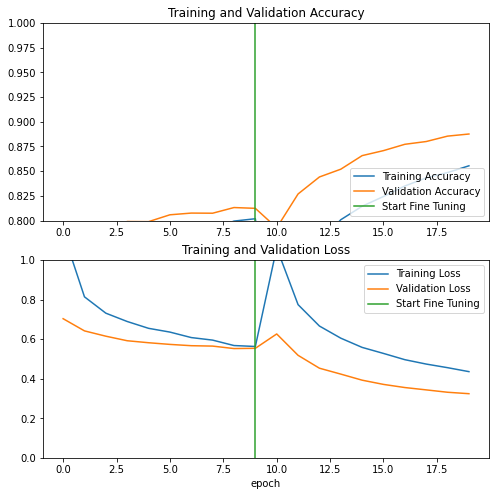

In [31]:
acc += fine_tune.history['categorical_accuracy']
val_acc += fine_tune.history['val_categorical_accuracy']

loss += fine_tune.history['loss']
val_loss += fine_tune.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [32]:
final_model = tf.keras.models.load_model("best_cnn_model_2.h5")
final_model.evaluate(test_data, test_labels)

313/313 [==============================] - 4s 10ms/step - loss: 0.3423 - categorical_accuracy: 0.8832


[0.34233981370925903, 0.8831999897956848]

## Conclusion
In this notebook, we saw different cnn models and their performance on CIFAR-10 dataset. I also implemented data augmentation on the data but it didn't improve our accuracy so i commented the codes. Feel free to change the codes and try it yourself by the way.
Also it's notable that fine tuning can tend to overfitting so number of epochs, batch_size, dropout, and etc are important hyperparameters in order to avoid overfitting.